# 머신러닝 Rogistic Regression 모델과 딥러닝 분류모델 비교 

# Classification : 2 Class

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from tensorflow.keras.optimizers import Adam

In [2]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.3.csv"
data = pd.read_csv(path)
data.drop(['Age_scale1', 'AgeGroup', 'SibSp','Parch' ], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


## 2.데이터 준비

Sex, Age, Fare 만 이용하여 Survived 를 예측하는 모델을 만들어 봅시다.

### (1) 데이터 분할1 : x, y 나누기

In [7]:
target = 'Survived'
features = ['Sex', 'Age', 'Fare']
X = data.loc[:, features]
y = data.loc[:, target]

### (2) 변수정리

### (3) NA 조치

### (4) 가변수화

In [5]:
x = pd.get_dummies(x, columns = ['Sex'], drop_first = True)
x.head()

,Age,Fare,Sex_male
0,22.0,7.2500,1
1,38.0,71.2833,0
2,26.0,7.9250,0
3,35.0,53.1000,0
4,35.0,8.0500,1


### (5) 데이터분할2

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 2022)

### (6) Scaling

In [10]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.Logistic Regression vs. DL (딥러닝)

### (1) Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

model1.fit(x_train, y_train)
print(list(x))
model1.coef_, model1.intercept_

['Age', 'Fare', 'Sex_male']


(array([[-0.77410527,  2.37435574, -2.2852748 ]]), array([1.07844411]))

In [22]:
# 나이가 많을수록, fare가 적을수록, 남자일수록 많이 죽었다는걸 가중치만으로 해석할 수 있음.

In [12]:
pred1 = model1.predict(x_val)

### (2) DL

* 모델 설계

In [13]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

3

In [14]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model2 = Sequential()

# Layer 정의
layer = Dense(1, input_shape = (nfeatures,), activation= 'sigmoid')  
# 이렇게 레이어 설계해주면 rogisticregression모델로 학습할때와 똑같은 메커니즘 띄게 된다. (둘 다 시그모이드 함수 통하니까)
# 물론 할당되는 가중치 값은 다를것이다. 
# 딥러닝은 여러 hidden layer층을 둬야 머신러닝과 다른 의미를 갖게 되겠지..? 
# 모델에 추가
model2.add(layer)

# 모델요약
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


* compile + 학습

In [15]:
model2.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy')

history = model2.fit(x_train, y_train, 
                    epochs = 60,
                    validation_split=0.2).history

Epoch 1/60


C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


16/16 [==============================] - 1s 15ms/step - loss: 0.5783 - val_loss: 0.5530
Epoch 2/60
16/16 [==============================] - 0s 5ms/step - loss: 0.5656 - val_loss: 0.5439
Epoch 3/60
16/16 [==============================] - 0s 4ms/step - loss: 0.5582 - val_loss: 0.5366
Epoch 4/60
16/16 [==============================] - 0s 5ms/step - loss: 0.5526 - val_loss: 0.5309
Epoch 5/60
16/16 [==============================] - 0s 5ms/step - loss: 0.5477 - val_loss: 0.5257
Epoch 6/60
16/16 [==============================] - 0s 4ms/step - loss: 0.5437 - val_loss: 0.5209
Epoch 7/60
16/16 [==============================] - 0s 4ms/step - loss: 0.5403 - val_loss: 0.5170
Epoch 8/60
16/16 [==============================] - 0s 5ms/step - loss: 0.5365 - val_loss: 0.5133
Epoch 9/60
16/16 [==============================] - 0s 4ms/step - loss: 0.5337 - val_loss: 0.5102
Epoch 10/60
16/16 [==============================] - 0s 4ms/step - loss: 0.5312 - val_loss: 0.5075
Epoch 11/60
16/16 [==========

* 학습결과 그래프

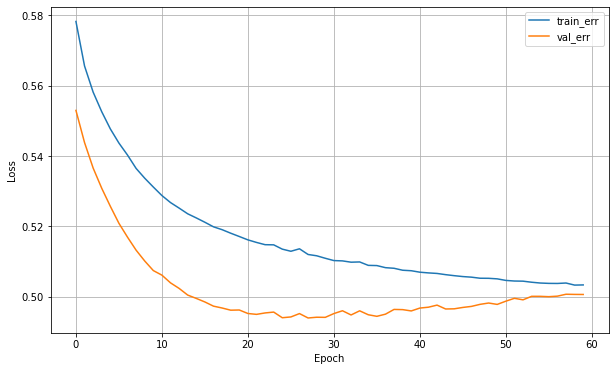

In [16]:
dl_history_plot(history)

In [17]:
pred2 = model2.predict(x_val)

# activation이 sigmoid --> 0 ~ 1 사이의 확률값.
# 그러므로 cut-off value(보통 0.5)를 기준으로 잘라서 0과 1로 만들어 준다.
pred2 = np.where(pred2 >= .5, 1, 0)

9/9 [==============================] - 0s 2ms/step


### (3) 모델 비교

* 가중치 비교

In [18]:
# 로지스틱 회귀
model1.coef_, model1.intercept_

(array([[-0.77410527,  2.37435574, -2.2852748 ]]), array([1.07844411]))

In [19]:
# DL
model2.layers[0].get_weights()

[array([[-1.3057996],
        [ 4.0138083],
        [-2.2487526]], dtype=float32),
 array([1.1611098], dtype=float32)]

* 성능비교

In [20]:
# 로지스틱 회귀
print(classification_report(y_val, pred1))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       168
           1       0.74      0.71      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [21]:
# DL
print(classification_report(y_val, pred2))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       168
           1       0.73      0.72      0.73       100

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



## 4.DL1
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할1

In [23]:
target = 'Survived'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화

In [24]:
cat_cols = ['Pclass','Sex', 'Embarked']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

* 데이터분할2

In [25]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 2022)

* 스케일링

In [26]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [27]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

8

In [59]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(2, input_shape=(nfeatures,), activation='relu'),
                    Dense(1, activation='sigmoid')])


# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 18        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


* compile + 학습

In [60]:
model.compile(optimizer=Adam(lr=0.1), loss='binary_crossentropy')

history = model3.fit(x_train, y_train, 
                    epochs = 60,
                    validation_split=0.2).history

Epoch 1/60


C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


16/16 [==============================] - 1s 30ms/step - loss: 0.4414 - val_loss: 0.4063
Epoch 2/60
16/16 [==============================] - 0s 13ms/step - loss: 0.4515 - val_loss: 0.4168
Epoch 3/60
16/16 [==============================] - 0s 6ms/step - loss: 0.4545 - val_loss: 0.4774
Epoch 4/60
16/16 [==============================] - 0s 6ms/step - loss: 0.4494 - val_loss: 0.4331
Epoch 5/60
16/16 [==============================] - 0s 6ms/step - loss: 0.4393 - val_loss: 0.4172
Epoch 6/60
16/16 [==============================] - 0s 7ms/step - loss: 0.4370 - val_loss: 0.4247
Epoch 7/60
16/16 [==============================] - 0s 8ms/step - loss: 0.4323 - val_loss: 0.4280
Epoch 8/60
16/16 [==============================] - 0s 14ms/step - loss: 0.4501 - val_loss: 0.4142
Epoch 9/60
16/16 [==============================] - 0s 13ms/step - loss: 0.4399 - val_loss: 0.4025
Epoch 10/60
16/16 [==============================] - 0s 13ms/step - loss: 0.4339 - val_loss: 0.4134
Epoch 11/60
16/16 [======

* 학습결과 그래프

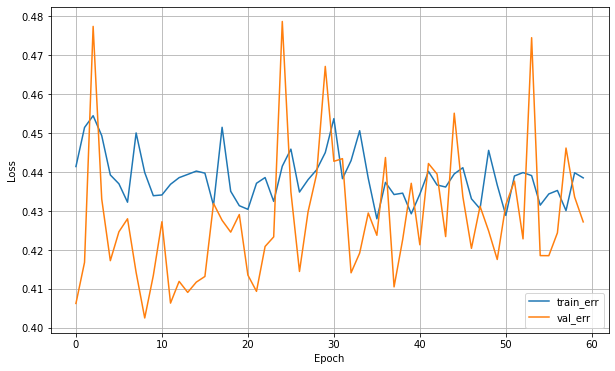

In [61]:
dl_history_plot(history)

* 예측 및 평가

In [62]:
pred = model.predict(x_val)
print(mean_absolute_error(y_val,pred))
print(r2_score(y_val, pred))


9/9 [==============================] - 0s 4ms/step
0.6413279340338351
-1.4069699069325337


In [1]:
pred = model.predict(x_val)
pred = np.where(pred >= .5, 1, 0)  # 임곗값을 0.5로 주고 0.5이하는 0,이상은 1로 반환하여 예측분류.
print(classification_report(y_val, pred))

NameError: name 'model' is not defined

## 5.DL2 : hidden layer
* 이제 레이어를 추가해 보겠습니다.


### (1) 모델 설계

In [64]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

8

In [65]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential()

# Layer 정의
layer1 = Dense(8, input_shape = (nfeatures,), activation = 'relu')
layer2 = Dense(1, activation = 'sigmoid')

# 모델에 추가
model.add(layer1)
model.add(layer2)

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


### (2) compile + 학습

In [66]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy')

history = model.fit(x_train, y_train
                     , epochs = 100, batch_size=32
                     , validation_split=0.2).history

C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
16/16 [==============================] - 1s 25ms/step - loss: 0.7477 - val_loss: 0.7489
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.7237 - val_loss: 0.7237
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.7028 - val_loss: 0.7039
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6875 - val_loss: 0.6866
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6741 - val_loss: 0.6740
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6638 - val_loss: 0.6639
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6559 - val_loss: 0.6551
Epoch 8/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6494 - val_loss: 0.6477
Epoch 9/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6434 - val_loss: 0.6416
Epoch 10/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6387 - val_loss: 0.6357
Epoch 11

* 학습결과 그래프

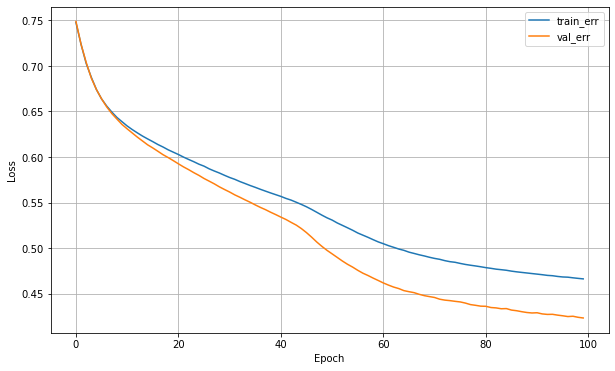

In [67]:
# train_err값은 점진적으로 줄어드는게 일반적이나, val_err는 커질수도 있음 (과적합 문제)
dl_history_plot(history)

* 예측 및 평가

In [68]:
pred = model.predict(x_val)
pred = np.where(pred >= .5, 1, 0)  # 임곗값을 0.5로 주고 0.5이하는 0,이상은 1로 반환하여 예측분류.
print(classification_report(y_val, pred))

9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       168
           1       0.76      0.71      0.73       100

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.81      0.80       268



### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | 옵션 |
| ---- | ---- | ---- | 
| dense (Dense) | (None, 16)  | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 1) | node, activation = 'sigmoid' |     

In [69]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(16, input_shape=(nfeatures,), activation='relu'),
                    Dense(1, activation='sigmoid')
                   ])

# Layer 정의


# 모델에 추가


# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy')

C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [102]:
history = model.fit(x_train, y_train
                     , epochs = 200, batch_size=32
                     , validation_split=0.2).history

Epoch 1/200
16/16 [==============================] - 2s 27ms/step - loss: 0.3828 - val_loss: 0.4162
Epoch 2/200
16/16 [==============================] - 0s 12ms/step - loss: 0.3797 - val_loss: 0.4179
Epoch 3/200
16/16 [==============================] - 0s 12ms/step - loss: 0.3807 - val_loss: 0.4202
Epoch 4/200
16/16 [==============================] - 0s 14ms/step - loss: 0.3797 - val_loss: 0.4184
Epoch 5/200
16/16 [==============================] - 0s 13ms/step - loss: 0.3790 - val_loss: 0.4178
Epoch 6/200
16/16 [==============================] - 0s 14ms/step - loss: 0.3798 - val_loss: 0.4169
Epoch 7/200
16/16 [==============================] - 0s 14ms/step - loss: 0.3796 - val_loss: 0.4194
Epoch 8/200
16/16 [==============================] - 0s 14ms/step - loss: 0.3792 - val_loss: 0.4198
Epoch 9/200
16/16 [==============================] - 0s 11ms/step - loss: 0.3788 - val_loss: 0.4193
Epoch 10/200
16/16 [==============================] - 0s 12ms/step - loss: 0.3795 - val_loss: 0.4185

In [103]:
pred = model.predict(x_val)
pred = np.where(pred >= .5, 1, 0)  # 임곗값을 0.5로 주고 0.5이하는 0,이상은 1로 반환하여 예측분류.
print(classification_report(y_val, pred))

9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       168
           1       0.84      0.56      0.67       100

    accuracy                           0.79       268
   macro avg       0.81      0.75      0.76       268
weighted avg       0.80      0.79      0.78       268



### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape |  옵션 |
| ---- | ---- | ---- | 
| dense (Dense) | (None, 16) |  node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) |  node, activation = 'relu'  |
| dense_2 (Dense) | (None, 1) |  node, activation = 'sigmoid'  |

In [96]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
# 요즘 뜨는 activation 함수 : swish(구글)
model = Sequential([Dense(16, input_shape=(nfeatures,), activation='swish'),
                    Dense(8, activation='swish'),
                    Dense(1, activation='sigmoid')
    
])

# Layer 정의


# 모델에 추가


# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.compile(optimizer=Adam(lr=0.01),loss='binary_crossentropy')

C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [98]:
history = model.fit(x_train, y_train,epochs=100,batch_size=32,validation_split=0.2).history

Epoch 1/100
16/16 [==============================] - 2s 48ms/step - loss: 0.6318 - val_loss: 0.5469
Epoch 2/100
16/16 [==============================] - 0s 13ms/step - loss: 0.5454 - val_loss: 0.4613
Epoch 3/100
16/16 [==============================] - 0s 14ms/step - loss: 0.5026 - val_loss: 0.4361
Epoch 4/100
16/16 [==============================] - 0s 14ms/step - loss: 0.4793 - val_loss: 0.4186
Epoch 5/100
16/16 [==============================] - 0s 13ms/step - loss: 0.4648 - val_loss: 0.4082
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4545 - val_loss: 0.4207
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4519 - val_loss: 0.4124
Epoch 8/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4424 - val_loss: 0.4049
Epoch 9/100
16/16 [==============================] - 0s 10ms/step - loss: 0.4459 - val_loss: 0.4292
Epoch 10/100
16/16 [==============================] - 0s 11ms/step - loss: 0.4385 - val_loss: 0.4035
Ep

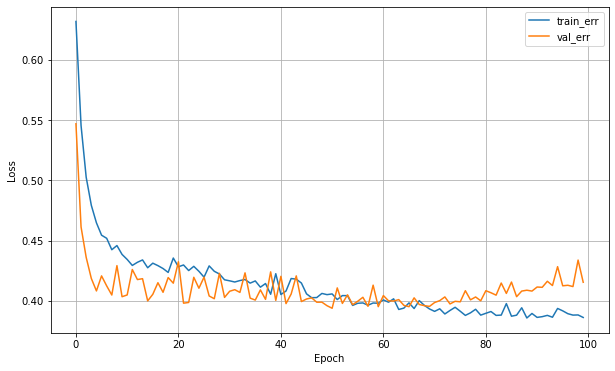

In [99]:
dl_history_plot(history)

In [100]:
pred = model.predict(x_val)
pred = np.where(pred >= .5, 1, 0)  # 임곗값을 0.5로 주고 0.5이하는 0,이상은 1로 반환하여 예측분류.
print(classification_report(y_val, pred))

9/9 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       168
           1       0.85      0.57      0.68       100

    accuracy                           0.80       268
   macro avg       0.82      0.76      0.77       268
weighted avg       0.81      0.80      0.79       268



### (5) 실습3

* 이번에는 여러분이 원하는 대로 설계하고, 학습해 봅시다.


In [ ]:
# 메모리 정리


# Sequential 타입 모델 선언


# Layer 정의


# 모델에 추가


# 모델요약
